In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path 
from mira.sources.vensim import template_model_from_mdl_file_url
from mira.sources.amr.stockflow import main
from mira.metamodel.ops import stratify

## We read a SIR mdl file from Vensim and create an equivalent MIRA template model.



In [2]:
SIR_URL = "https://raw.githubusercontent.com/SDXorg/test-models/master/samples/SIR/SIR.mdl"
vensim_tm_sir = template_model_from_mdl_file_url(SIR_URL)

## The SIR mdl file is found in the Vensim example model repo.

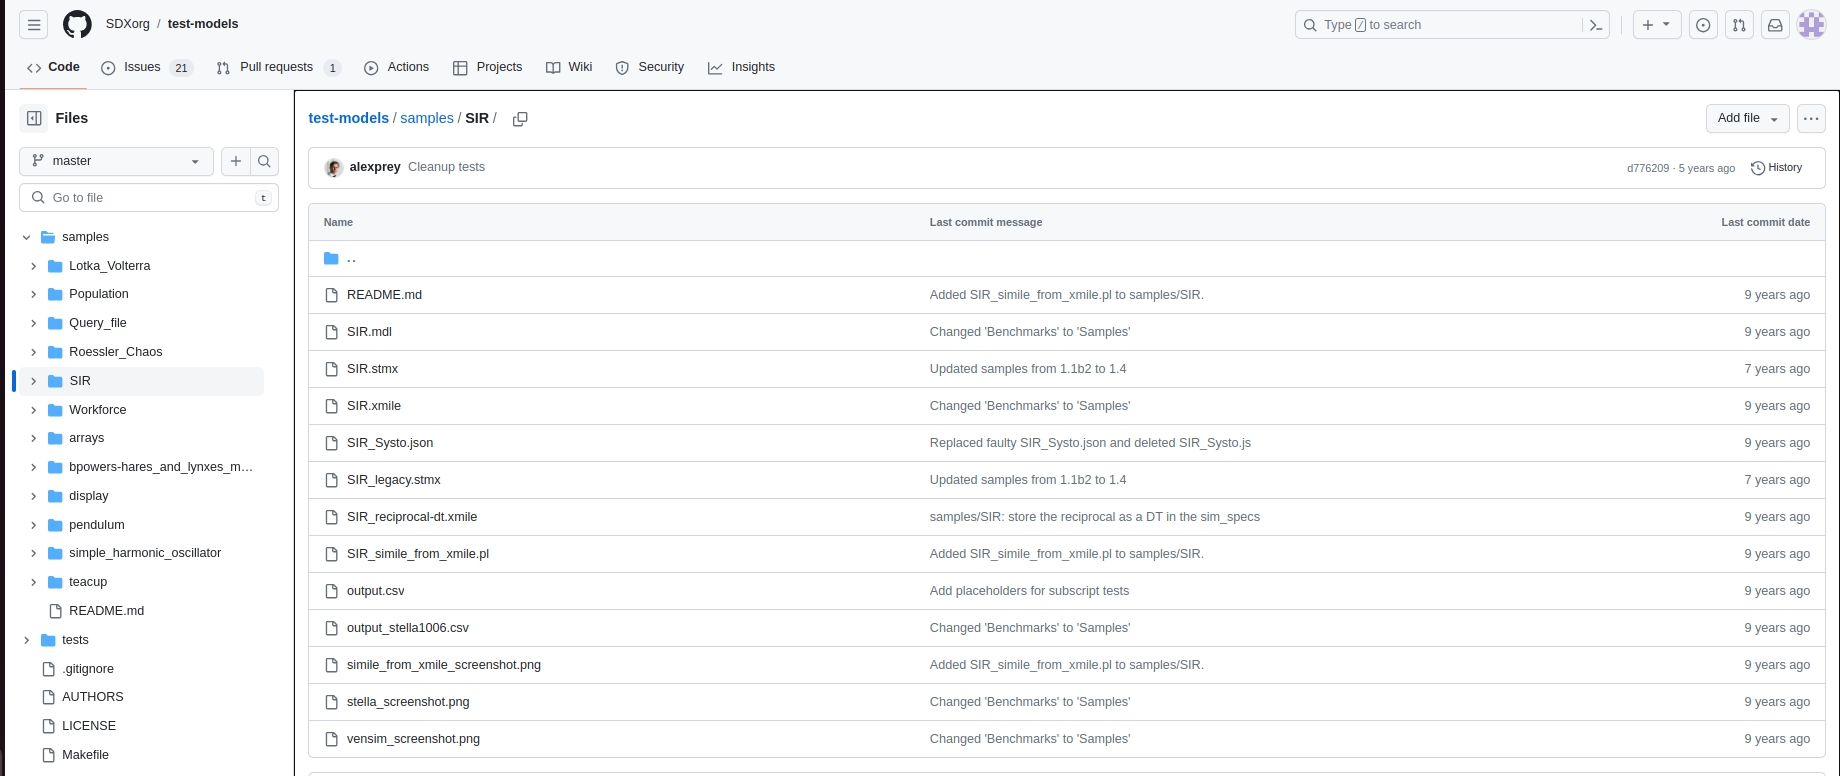

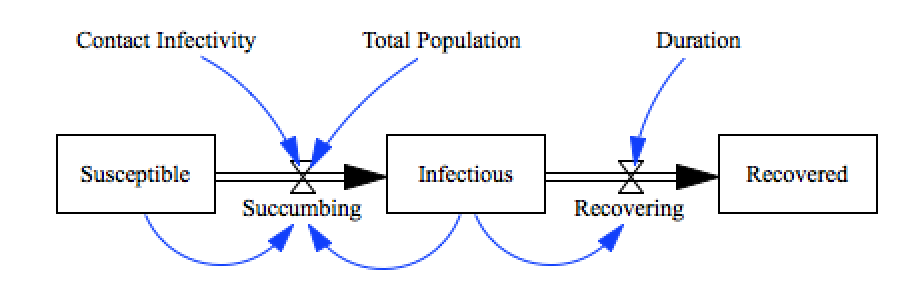


## Define key to stratify on and stratum. We define three different age groups to stratify our template model.

In [3]:
stratification_key = "age"
strata = ['young', 'middle', 'old']

## Parameters of the template model.

In [4]:
for param in vensim_tm_sir.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))

Parameter Name: contact_infectivity | Value: 0.3
Parameter Name: duration | Value: 5.0
Parameter Name: total_population | Value: 1000.0
Parameter Name: infectious0 | Value: 5.0
Parameter Name: recovered0 | Value: 0.0
Parameter Name: susceptible0 | Value: 1000.0


## Rate-laws of the template model.

In [5]:
for template in vensim_tm_sir.templates:
    print("Rate-law: {}".format(template.rate_law))

Rate-law: contact_infectivity*infectious*susceptible/total_population
Rate-law: infectious/duration


## Visualize the template model loaded in from an Vensim mdl file.

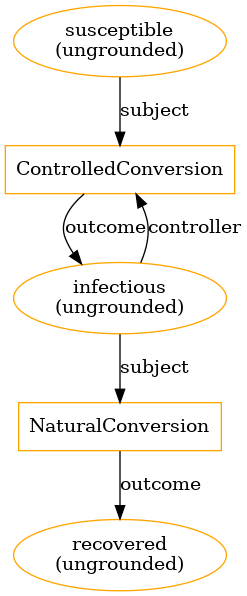

In [6]:
vensim_tm_sir.draw_jupyter()

## Stratify the template model by age and visualize it.

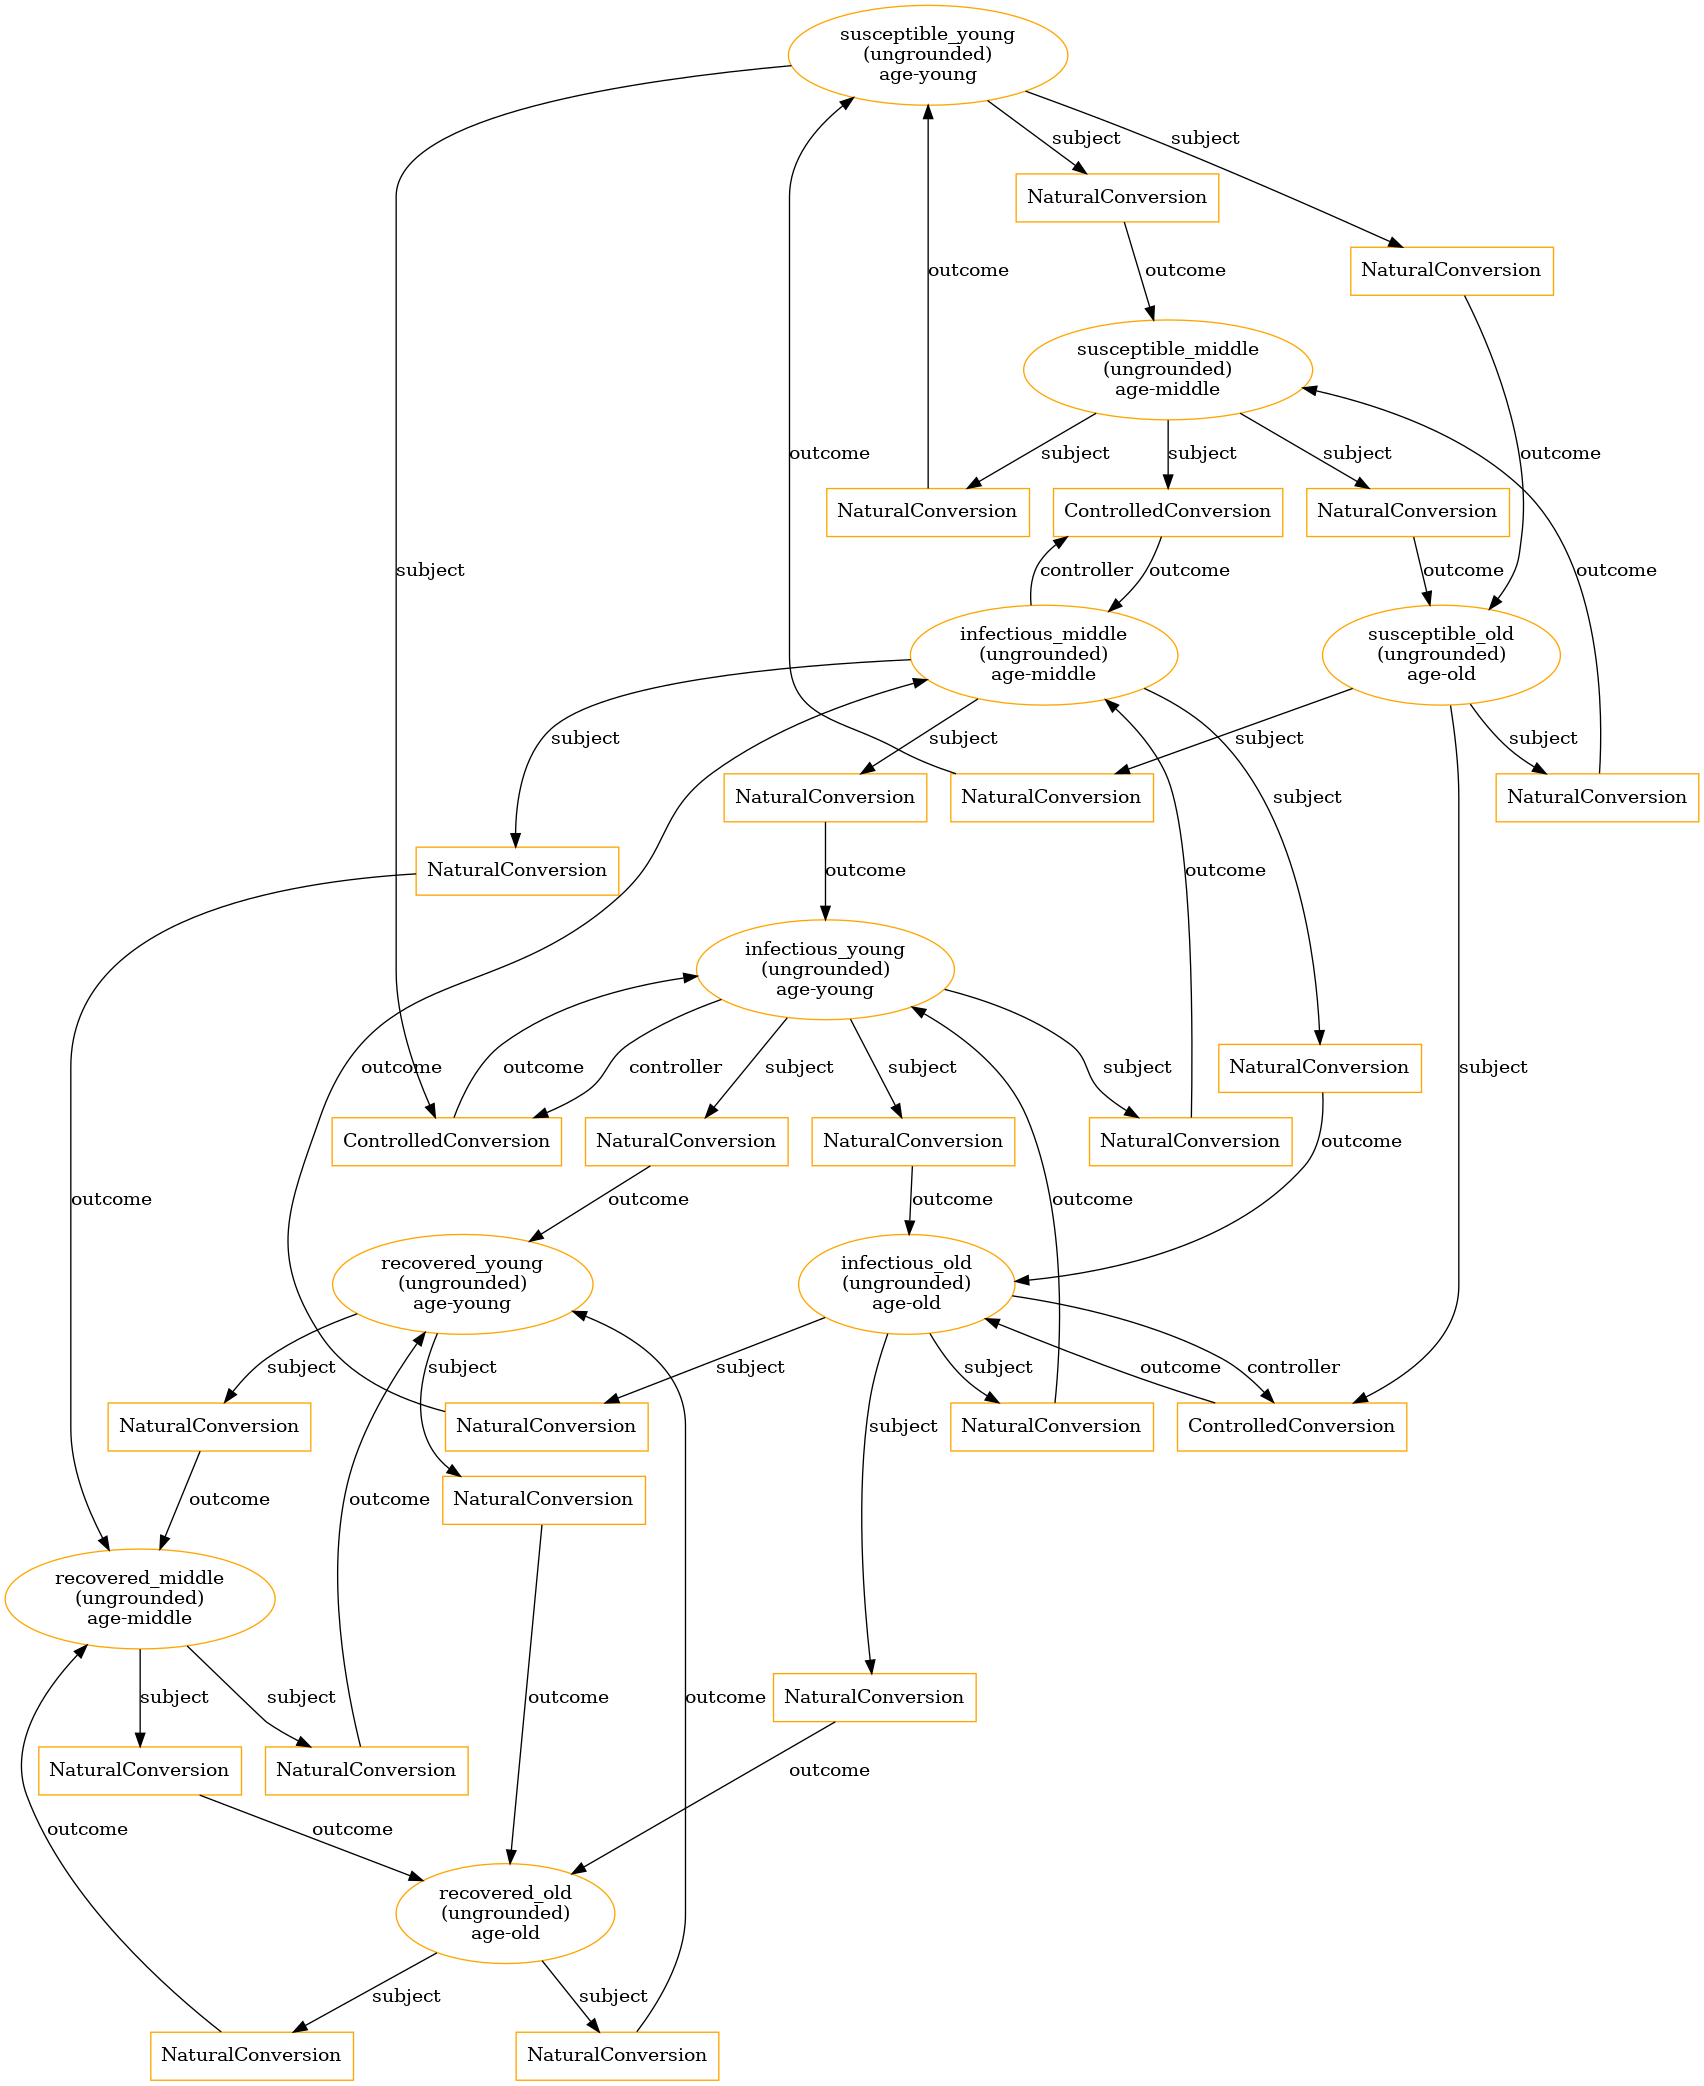

In [7]:
vensim_strat = stratify(vensim_tm_sir,key=stratification_key,strata=strata)
vensim_strat.draw_jupyter()

## Print parameters and rate-laws after the template model has been stratified.

In [8]:
for param in vensim_strat.parameters.values():
    print("Parameter Name: {} | Value: {}".format(param.name,param.value))
print()
for template in vensim_strat.templates:
    print("Rate-law: {}".format(template.rate_law))

Parameter Name: contact_infectivity_0 | Value: 0.3
Parameter Name: contact_infectivity_1 | Value: 0.3
Parameter Name: contact_infectivity_2 | Value: 0.3
Parameter Name: duration_0 | Value: 5.0
Parameter Name: duration_1 | Value: 5.0
Parameter Name: duration_2 | Value: 5.0
Parameter Name: total_population_0 | Value: 1000.0
Parameter Name: total_population_1 | Value: 1000.0
Parameter Name: total_population_2 | Value: 1000.0
Parameter Name: infectious0 | Value: 5.0
Parameter Name: recovered0 | Value: 0.0
Parameter Name: susceptible0 | Value: 1000.0
Parameter Name: p_middle_old | Value: 0.1
Parameter Name: p_old_middle | Value: 0.1
Parameter Name: p_middle_young | Value: 0.1
Parameter Name: p_young_middle | Value: 0.1
Parameter Name: p_old_young | Value: 0.1
Parameter Name: p_young_old | Value: 0.1

Rate-law: contact_infectivity_0*infectious_middle*susceptible_middle/total_population_0
Rate-law: contact_infectivity_1*infectious_old*susceptible_old/total_population_1
Rate-law: contact_infec